<a href="https://colab.research.google.com/github/rajiul123/Heart_Disease_Prediction_Using_Logistic_Regression/blob/main/Heart_Disease_Prediction_Using_Logistic_Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.optimize as opt
import statsmodels.api as sm
from sklearn import preprocessing
%matplotlib inline

In [2]:
df = pd.read_csv("datasets/framingham.csv")

**Inspecting Dataset**

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4240 entries, 0 to 4239
Data columns (total 16 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   male             4240 non-null   int64  
 1   age              4240 non-null   int64  
 2   education        4135 non-null   float64
 3   currentSmoker    4240 non-null   int64  
 4   cigsPerDay       4211 non-null   float64
 5   BPMeds           4187 non-null   float64
 6   prevalentStroke  4240 non-null   int64  
 7   prevalentHyp     4240 non-null   int64  
 8   diabetes         4240 non-null   int64  
 9   totChol          4190 non-null   float64
 10  sysBP            4240 non-null   float64
 11  diaBP            4240 non-null   float64
 12  BMI              4221 non-null   float64
 13  heartRate        4239 non-null   float64
 14  glucose          3852 non-null   float64
 15  TenYearCHD       4240 non-null   int64  
dtypes: float64(9), int64(7)
memory usage: 530.1 KB


In [4]:
df.describe()

,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
count,4240.000000,4240.000000,4135.000000,4240.000000,4211.000000,4187.000000,4240.000000,4240.000000,4240.000000,4190.000000,4240.000000,4240.000000,4221.000000,4239.000000,3852.000000,4240.000000
mean,0.429245,49.580189,1.979444,0.494104,9.005937,0.029615,0.005896,0.310613,0.025708,236.699523,132.354599,82.897759,25.800801,75.878981,81.963655,0.151887
std,0.495027,8.572942,1.019791,0.500024,11.922462,0.169544,0.076569,0.462799,0.158280,44.591284,22.033300,11.910394,4.079840,12.025348,23.954335,0.358953
min,0.000000,32.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,107.000000,83.500000,48.000000,15.540000,44.000000,40.000000,0.000000
25%,0.000000,42.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,206.000000,117.000000,75.000000,23.070000,68.000000,71.000000,0.000000
50%,0.000000,49.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,234.000000,128.000000,82.000000,25.400000,75.000000,78.000000,0.000000
75%,1.000000,56.000000,3.000000,1.000000,20.000000,0.000000,0.000000,1.000000,0.000000,263.000000,144.000000,90.000000,28.040000,83.000000,87.000000,0.000000
max,1.000000,70.000000,4.000000,1.000000,70.000000,1.000000,1.000000,1.000000,1.000000,696.000000,295.000000,142.500000,56.800000,143.000000,394.000000,1.000000


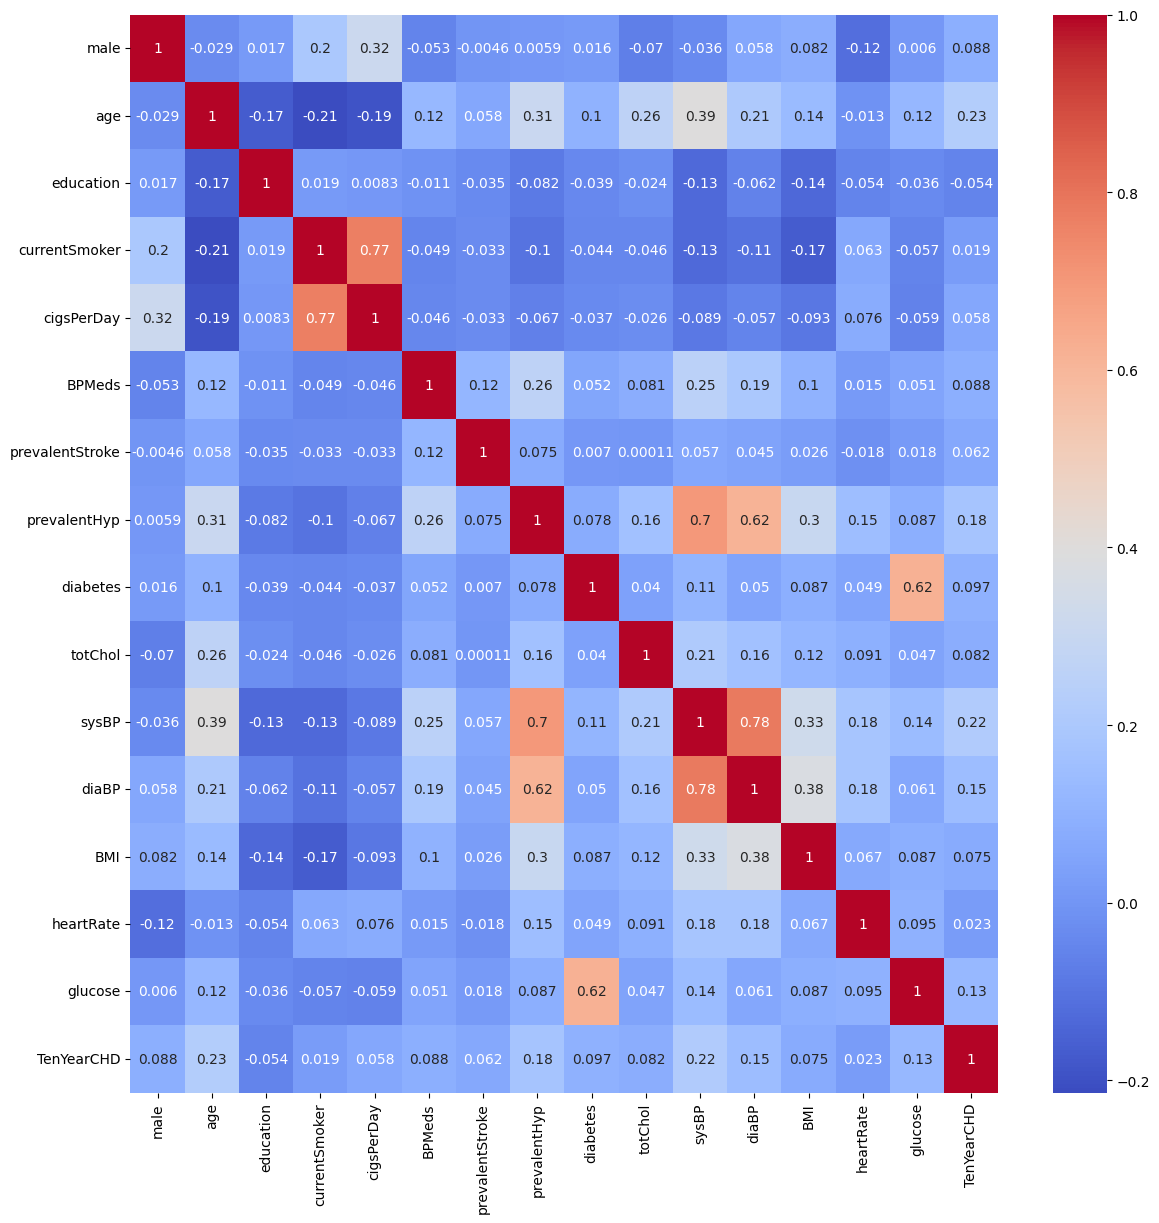

In [6]:
# findings correlation
fig, ax = plt.subplots(figsize=(14, 14))
sns.heatmap(df.corr(), annot=True, cmap="coolwarm")
plt.show()

# Observations
* The dataset has 16 columns and 4240 entries
* some columns has some null or NaN values. Such columns are education, cigsPerDay, BPMeds, totChol, BMI, heartRate, glucose
* it seems education column has no direct relation with heart diseas

**Cleaning Data**

In [7]:
#dropping education column
df.drop("education", axis=1, inplace=True)
df.head()

,male,age,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,1,39,0,0.0,0.0,0,0,0,195.0,106.0,70.0,26.97,80.0,77.0,0
1,0,46,0,0.0,0.0,0,0,0,250.0,121.0,81.0,28.73,95.0,76.0,0
2,1,48,1,20.0,0.0,0,0,0,245.0,127.5,80.0,25.34,75.0,70.0,0
3,0,61,1,30.0,0.0,0,1,0,225.0,150.0,95.0,28.58,65.0,103.0,1
4,0,46,1,23.0,0.0,0,0,0,285.0,130.0,84.0,23.10,85.0,85.0,0


In [9]:
#removing null values
df.dropna(axis=0, inplace=True)

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 3751 entries, 0 to 4239
Data columns (total 15 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   male             3751 non-null   int64  
 1   age              3751 non-null   int64  
 2   currentSmoker    3751 non-null   int64  
 3   cigsPerDay       3751 non-null   float64
 4   BPMeds           3751 non-null   float64
 5   prevalentStroke  3751 non-null   int64  
 6   prevalentHyp     3751 non-null   int64  
 7   diabetes         3751 non-null   int64  
 8   totChol          3751 non-null   float64
 9   sysBP            3751 non-null   float64
 10  diaBP            3751 non-null   float64
 11  BMI              3751 non-null   float64
 12  heartRate        3751 non-null   float64
 13  glucose          3751 non-null   float64
 14  TenYearCHD       3751 non-null   int64  
dtypes: float64(8), int64(7)
memory usage: 468.9 KB


In [11]:
print(df.head(), df.shape)
print(df.TenYearCHD.value_counts())

   male  age  currentSmoker  cigsPerDay  BPMeds  ...  diaBP    BMI  heartRate  glucose  TenYearCHD
0     1   39              0         0.0     0.0  ...   70.0  26.97       80.0     77.0           0
1     0   46              0         0.0     0.0  ...   81.0  28.73       95.0     76.0           0
2     1   48              1        20.0     0.0  ...   80.0  25.34       75.0     70.0           0
3     0   61              1        30.0     0.0  ...   95.0  28.58       65.0    103.0           1
4     0   46              1        23.0     0.0  ...   84.0  23.10       85.0     85.0           0

[5 rows x 15 columns] (3751, 15)
TenYearCHD
0    3179
1     572
Name: count, dtype: int64


**Finding outliers**

In [14]:
df[abs(df - df.mean()) > 3 * df.std()].all(axis=1)

,0
0,True
1,True
2,True
3,True
4,True
...,...
4233,True
4234,True
4237,True
4238,True


<Axes: >

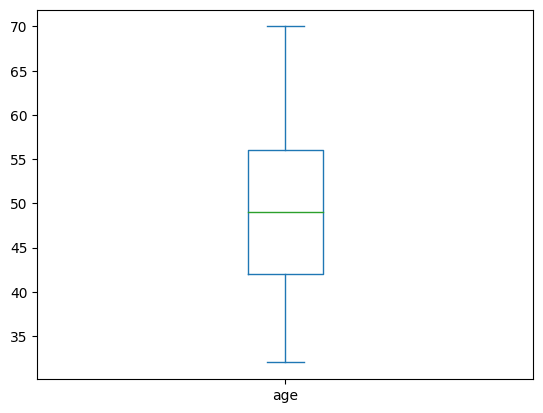

In [17]:
df["age"].plot(kind="box")

<Axes: >

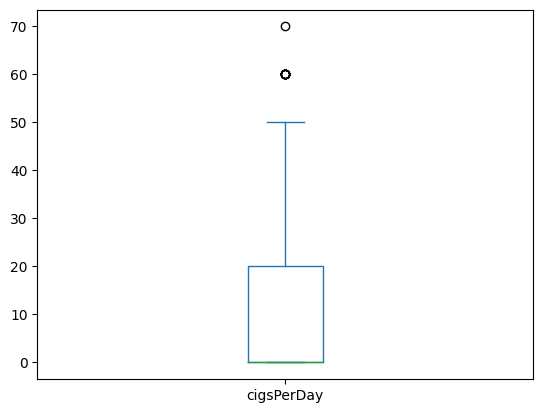

In [19]:
df["cigsPerDay"].plot(kind="box")

<Axes: >

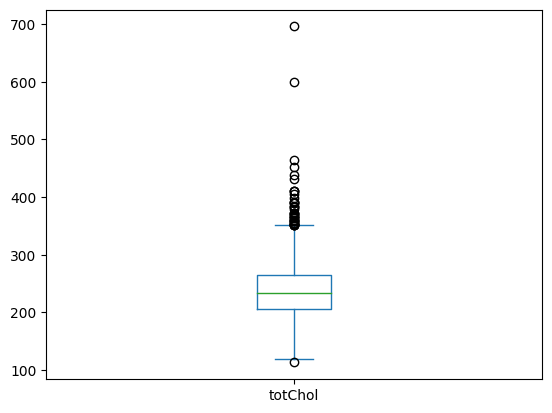

In [22]:
df["totChol"].plot(kind="box")

<Axes: >

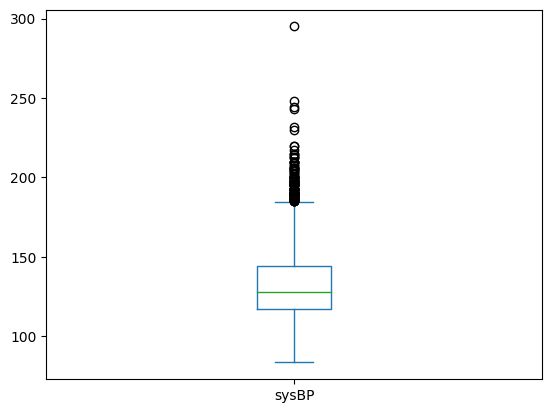

In [23]:
df["sysBP"].plot(kind="box")

<Axes: >

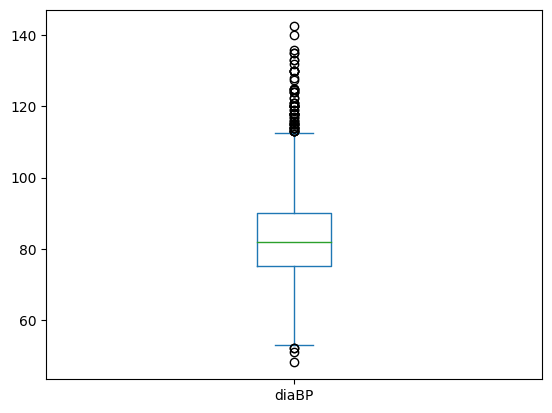

In [24]:
df["diaBP"].plot(kind="box")

<Axes: >

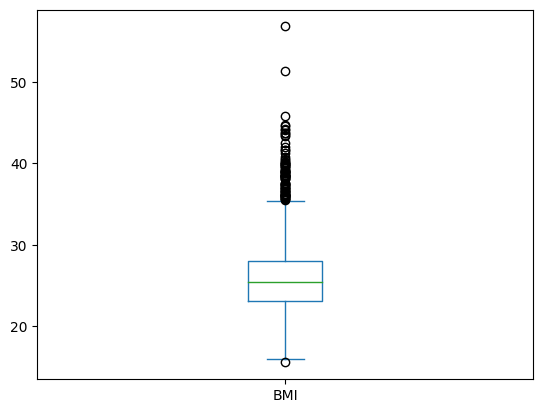

In [25]:
df["BMI"].plot(kind="box")

<Axes: >

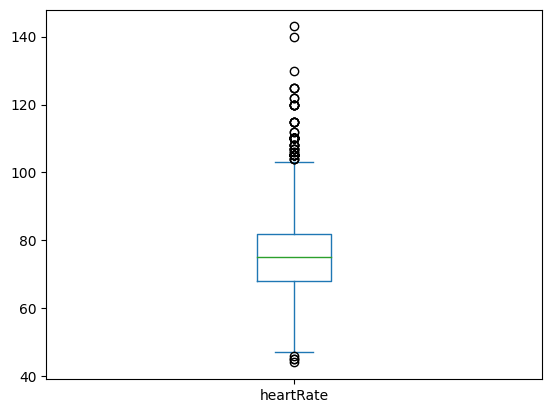

In [26]:
df["heartRate"].plot(kind="box")

<Axes: >

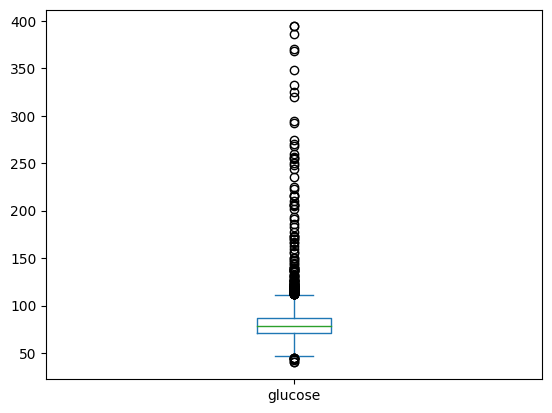

In [27]:
df["glucose"].plot(kind="box")

In [29]:
import scipy
scipy.stats.zscore(df)

,male,age,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,1.116292,-1.233910,-0.977069,-0.755527,-0.177044,-0.075034,-0.673285,-0.167191,-0.939971,-1.196195,-1.084431,0.285780,0.359347,-0.204365,-0.424183
1,-0.895823,-0.417017,-0.977069,-0.755527,-0.177044,-0.075034,-0.673285,-0.167191,0.293057,-0.515725,-0.162478,0.718738,1.614075,-0.246242,-0.424183
2,1.116292,-0.183620,1.023469,0.921832,-0.177044,-0.075034,-0.673285,-0.167191,0.180963,-0.220855,-0.246291,-0.115199,-0.058895,-0.497509,-0.424183
3,-0.895823,1.333466,1.023469,1.760511,-0.177044,-0.075034,1.485255,-0.167191,-0.267411,0.799850,1.010918,0.681838,-0.895380,0.884456,2.357476
4,-0.895823,-0.417017,1.023469,1.173436,-0.177044,-0.075034,-0.673285,-0.167191,1.077711,-0.107443,0.088964,-0.666236,0.777590,0.130657,-0.424183
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4233,1.116292,0.049778,1.023469,-0.671659,-0.177044,-0.075034,1.485255,-0.167191,1.705434,2.115426,0.759476,0.039781,-0.811732,0.172535,2.357476
4234,1.116292,0.166477,1.023469,2.850795,-0.177044,-0.075034,-0.673285,-0.167191,-0.670947,-0.266220,-0.246291,-1.500173,-0.895380,-0.581264,-0.424183
4237,-0.895823,0.283176,-0.977069,-0.755527,-0.177044,-0.075034,-0.673285,-0.167191,0.719012,0.051333,0.005150,-1.067215,0.359347,1.051967,-0.424183
4238,1.116292,-1.117211,-0.977069,-0.755527,-0.177044,-0.075034,1.485255,-0.167191,-1.164158,0.391568,1.262360,-0.051239,-0.728083,-0.413753,-0.424183


# Observation
* from boxplot we can assume that there are a number of outliers in the dataset.
* But we cannot drop them as some patient can have a greater or lower than standard readings.
* So we are going to standardize the readings. In this way we can reduce the impact of the outliers

**Standardization**

In [33]:
from sklearn.preprocessing import StandardScaler

X = df[["age", "male", "currentSmoker", "cigsPerDay", "BPMeds", "prevalentStroke", "prevalentHyp", "diabetes", "totChol", "sysBP", "diaBP", "BMI", "heartRate", "glucose"]]
y = df["TenYearCHD"]

scaler = StandardScaler()
X = pd.DataFrame(scaler.fit_transform(X), columns=X.columns)

In [34]:
X.head()

,age,male,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose
0,-1.233910,1.116292,-0.977069,-0.755527,-0.177044,-0.075034,-0.673285,-0.167191,-0.939971,-1.196195,-1.084431,0.285780,0.359347,-0.204365
1,-0.417017,-0.895823,-0.977069,-0.755527,-0.177044,-0.075034,-0.673285,-0.167191,0.293057,-0.515725,-0.162478,0.718738,1.614075,-0.246242
2,-0.183620,1.116292,1.023469,0.921832,-0.177044,-0.075034,-0.673285,-0.167191,0.180963,-0.220855,-0.246291,-0.115199,-0.058895,-0.497509
3,1.333466,-0.895823,1.023469,1.760511,-0.177044,-0.075034,1.485255,-0.167191,-0.267411,0.799850,1.010918,0.681838,-0.895380,0.884456
4,-0.417017,-0.895823,1.023469,1.173436,-0.177044,-0.075034,-0.673285,-0.167191,1.077711,-0.107443,0.088964,-0.666236,0.777590,0.130657


**Splitting Data**

In [35]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((2625, 14), (1126, 14), (2625,), (1126,))

#Exploratory Data Analysis

**Ten Year’s CHD Record of all the patients available in the dataset**

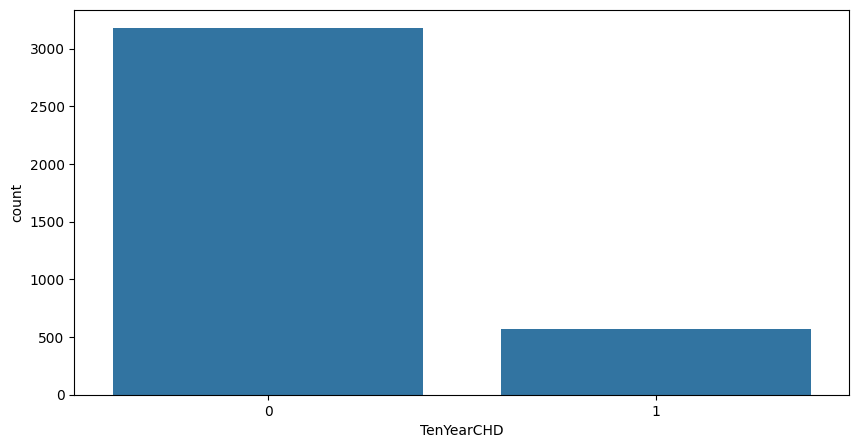

In [36]:
#counting no. of patients affected with CHD
plt.figure(figsize=(10, 5))
sns.countplot(x="TenYearCHD", data=df)
plt.show()

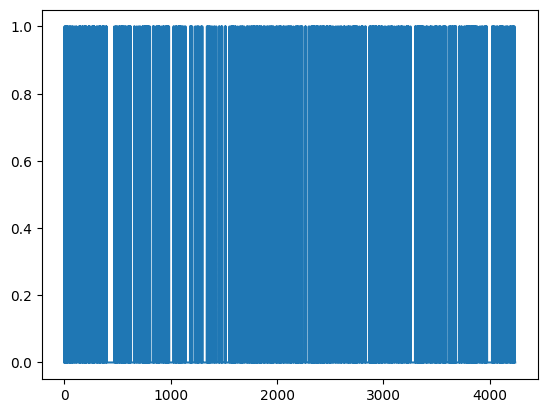

In [37]:
#Counting number of patients affected by CHD where (0= Not Affected; 1= Affected)
df["TenYearCHD"].plot()
plt.show()

# Fitting Logistic Regression Model

In [38]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()
lr.fit(X_train, y_train)

LogisticRegression()

In [39]:
y_pred = lr.predict(X_test)

**Evaluating Logistic Regression Model**

In [52]:
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
print(f"Confusion Matrix: \n{confusion_matrix(y_test, y_pred)}")
print(f"Accuracy Score: {accuracy_score(y_test, y_pred)}")

Confusion Matrix: 
[[926  12]
 [175  13]]
Accuracy Score: 0.8339253996447602


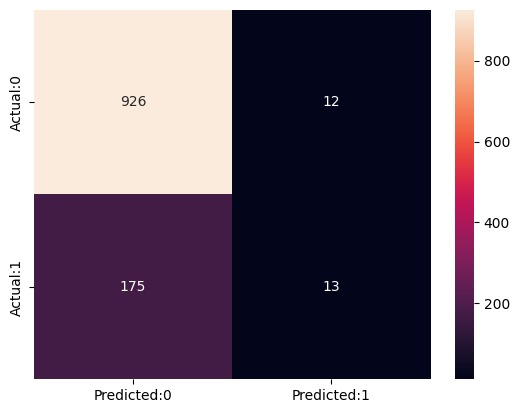

In [53]:
cm = confusion_matrix(y_test, y_pred)
conf_matrix = pd.DataFrame(data = cm,
                           columns = ['Predicted:0', 'Predicted:1'],
                           index =['Actual:0', 'Actual:1'])
sns.heatmap(conf_matrix, annot=True, fmt='d')
plt.show()

**classification Report**

In [54]:
print("Classification Report")
print(classification_report(y_test, y_pred))

Classification Report
              precision    recall  f1-score   support

           0       0.84      0.99      0.91       938
           1       0.52      0.07      0.12       188

    accuracy                           0.83      1126
   macro avg       0.68      0.53      0.52      1126
weighted avg       0.79      0.83      0.78      1126

